In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
df=pd.read_csv("bmw.csv")
df.sample(2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5287,3 Series,2014,12450,Manual,56523,Diesel,125,57.6,2.0
9291,1 Series,2018,21999,Automatic,16475,Petrol,145,39.8,3.0


In [20]:
numerical_features=df.select_dtypes(exclude="object").columns
numerical_features=[col for col in numerical_features if col!="price"]#Removing dependent feature 
categorical_features=df.select_dtypes(include="object").columns
print("We have {} numerical features :{}".format(len(numerical_features),numerical_features))
print("We have {} numerical features :{}".format(len(categorical_features),categorical_features))

We have 5 numerical features :['year', 'mileage', 'tax', 'mpg', 'engineSize']
We have 3 numerical features :Index(['model', 'transmission', 'fuelType'], dtype='object')


In [21]:
onehotencoding=OneHotEncoder(handle_unknown="ignore")
scaler=StandardScaler()

scaler_transformer=ColumnTransformer([("onehotencoding",onehotencoding,categorical_features),("standardscaler",scaler,numerical_features)])
tree_transformer=ColumnTransformer([("onehotencoding",onehotencoding,categorical_features),("standardscaler","passthrough",numerical_features)])

In [22]:
X=df.drop("price",axis=1)
y=df["price"]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")




Number of training samples: 8085
Number of test samples: 2696


In [24]:


models = {
    "LinearRegression": Pipeline([("scaler", scaler_transformer),("model", LinearRegression())]),
    "Ridge":Pipeline([("scaler",scaler_transformer),("model",Ridge())]),
    "Lasso":Pipeline([("scaler",scaler_transformer),("model",Lasso())]),
    "ElasticNet":Pipeline([("scaler",scaler_transformer),("model",ElasticNet())]),
    "SVR":Pipeline([("scaler",scaler_transformer),("model",SVR())]),
    "KNN":Pipeline([("scaler",scaler_transformer),("model",KNeighborsRegressor())]),
    "RandomForestRegressor":Pipeline([("scaler",tree_transformer),("model",RandomForestRegressor())]),
    "AdaBoostRegressor":Pipeline([("scaler",tree_transformer),("model",AdaBoostRegressor())]),
    "GradientBoostingRegressor":Pipeline([("scaler",tree_transformer),("model",GradientBoostingRegressor())]),
    "XGBoost":Pipeline([("scaler",tree_transformer),("model",XGBRegressor())]),
    "DecisionTreeRegression":Pipeline([("scaler",tree_transformer),("model",DecisionTreeRegressor())])
    

}


In [25]:
def evalution_metrics(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    accuracy_score=r2_score(true,predicted)

    return mse,mae,rmse,accuracy_score

In [ ]:
Model_name=[]
Accuracy_train=[]
Accuracy_test=[]
Error_train=[]
Error_test=[]


for name,model in models.items():
    print(f"========{name}=======\n")
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    mse_train,mae_train,rmse_train,score_train=evalution_metrics(y_train,y_train_pred)
    mse_test,mae_test,rmse_test,score_test=evalution_metrics(y_test,y_test_pred)
    Model_name.append(name)
    Accuracy_train.append(score_train)
    Accuracy_test.append(score_test)
    Error_train.append(mae_train)
    Error_test.append(mae_test)

    print("Metrics on Training Data")
    print("------------------\n")
    print("Mean Squared Error of Training data",mse_train)
    print("Mean Absolute Error of Training data",mae_train)
    print("Root Mean Sqared of Training data",rmse_train)
    print("R2 score of Training Data",score_train)

    print("Metrics on Test Data")
    print("------------------\n")
    print("Mean Squared Error of Test data",mse_test)
    print("Mean Absolute Error of Test data",mae_test)
    print("Root Mean Sqared of Test data",rmse_test)
    print("R2 score of Test Data",score_test)
    if name=="XGBoost":
       xgb_predict=model.predict(X_test)








========LinearRegression=======

Metrics on Training Data
------------------

Mean Squared Error of Training data 17296489.29463521
Mean Absolute Error of Training data 2764.9174744011493
Root Mean Sqared of Training data 4158.904819136308
R2 score of Training Data 0.8685083821077374
Metrics on Test Data
------------------

Mean Squared Error of Test data 17308111.203588564
Mean Absolute Error of Test data 2793.36105307834
Root Mean Sqared of Test data 4160.301816405699
R2 score of Test Data 0.8632183671823188
========Ridge=======

Metrics on Training Data
------------------

Mean Squared Error of Training data 17329257.343733195
Mean Absolute Error of Training data 2777.2997521075295
Root Mean Sqared of Training data 4162.842459634186
R2 score of Training Data 0.8682592723769896
Metrics on Test Data
------------------

Mean Squared Error of Test data 17391768.210585635
Mean Absolute Error of Test data 2812.179430219064
Root Mean Sqared of Test data 4170.343895961775
R2 score of Test D

In [35]:
result = pd.DataFrame(
    zip(Model_name, Accuracy_train, Accuracy_test, Error_train, Error_test),
    columns=["Model_name", "Accuracy_train", "Accuracy_test", "Error_train", "Error_test"]
).sort_values(by="Accuracy_train",ascending=False)
result


,Model_name,Accuracy_train,Accuracy_test,Error_train,Error_test
10,DecisionTreeRegression,0.999511,0.923232,23.772754,1992.560142
6,RandomForestRegressor,0.992357,0.944005,577.509091,1590.407449
9,XGBoost,0.983686,0.944427,1004.957703,1571.983887
5,KNN,0.953069,0.925638,1398.521039,1785.627967
8,GradientBoostingRegressor,0.934608,0.920169,1895.175761,2022.815161
0,LinearRegression,0.868508,0.863218,2764.917474,2793.361053
2,Lasso,0.868430,0.862995,2772.309982,2800.815679
1,Ridge,0.868259,0.862557,2777.299752,2812.179430
7,AdaBoostRegressor,0.670957,0.649985,5580.233409,5560.008799
3,ElasticNet,0.635070,0.640476,4459.893881,4469.138870


Text(0.5, 0.98, 'Model Performance Comparison (BMW Price Prediction)')

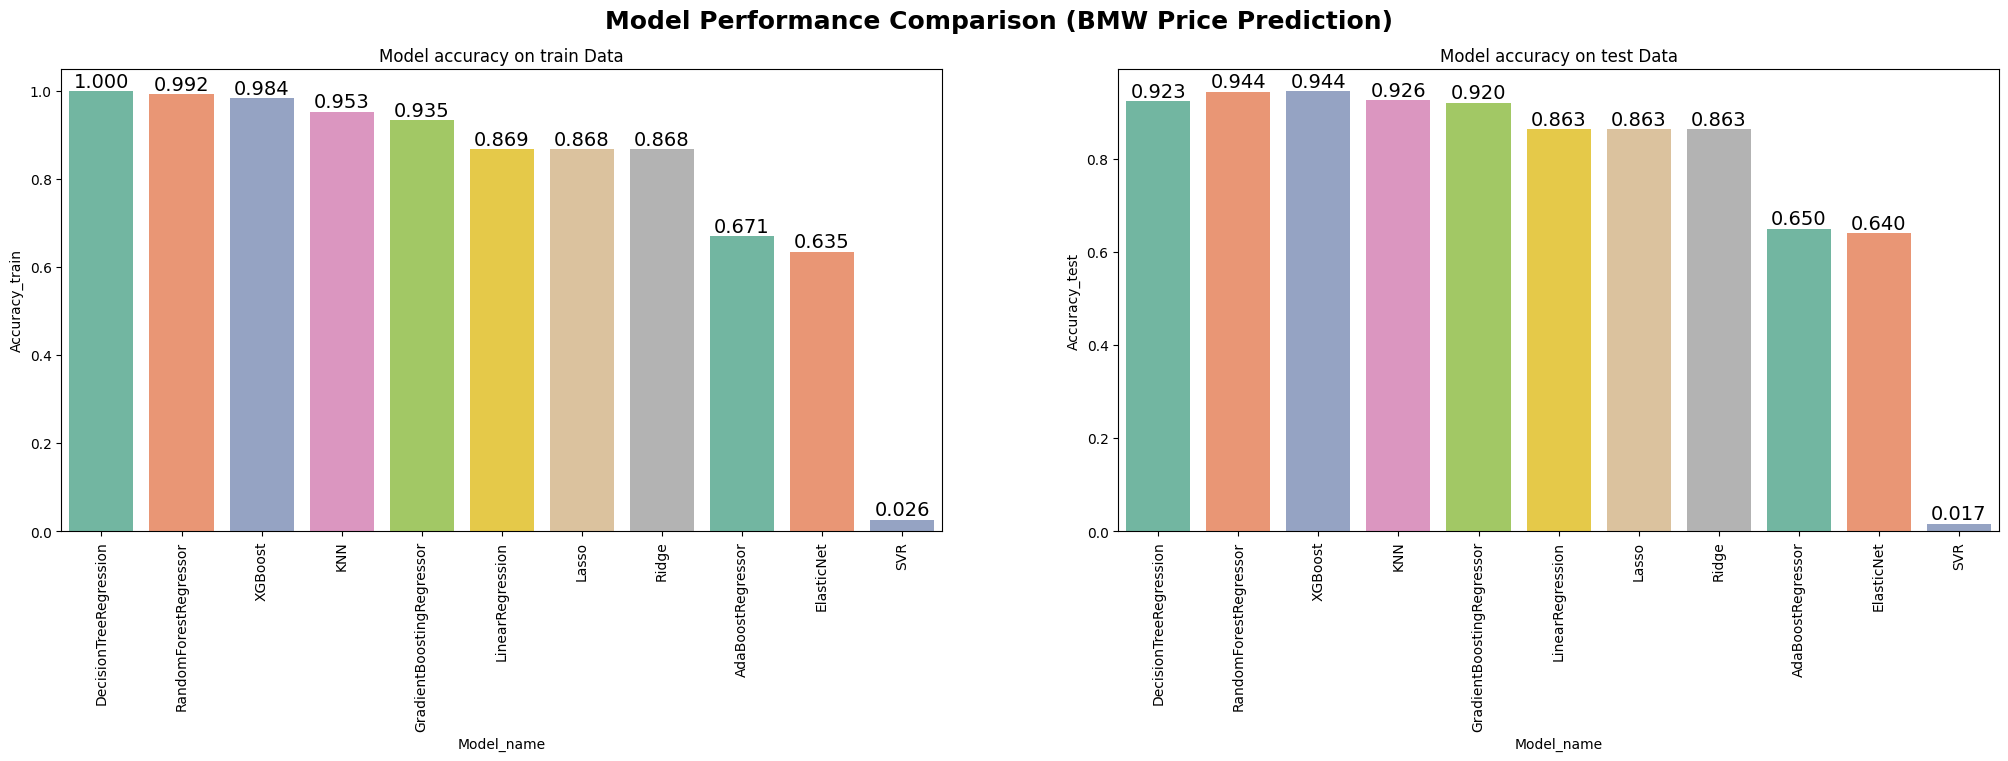

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(25,6))
sns.barplot(x="Model_name",y="Accuracy_train",data=result,palette="Set2",ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",fmt="%.3f",fontsize=14)
ax[0].set_title("Model accuracy on train Data")
ax[0].tick_params(axis="x",rotation=90)

sns.barplot(x="Model_name",y="Accuracy_test",data=result,palette="Set2",ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color="black",fmt="%.3f",fontsize=14)
ax[1].set_title("Model accuracy on test Data")
ax[1].tick_params(axis="x",rotation=90)
plt.suptitle(
    "Model Performance Comparison (BMW Price Prediction)",
    fontsize=18,
    fontweight="bold"
)


In [28]:
pd.DataFrame({"xgb predict":xgb_predict,"actuval":y_test,"difference":xgb_predict-y_test})

,xgb predict,actuval,difference
8728,14164.240234,15300,-1135.759766
761,13574.712891,15495,-1920.287109
7209,40928.164062,39875,1053.164062
6685,21485.929688,21730,-244.070312
8548,17023.757812,13799,3224.757812
...,...,...,...
9825,27497.242188,25500,1997.242188
3522,50890.718750,52700,-1809.281250
9757,16421.296875,15795,626.296875
6100,27009.285156,29840,-2830.714844
